In [225]:
import os
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import duckdb

In [226]:
def korea_events_reader(filename):
    current_path = os.getcwd()
    return current_path + "/" + filename
file_paths = ["Kpop events 2017.csv", "Kpop events 2018.csv", "Kpop events 2019.csv", 
              "Kpop events 2020.csv", "Kpop events 2021.csv", "Kpop events 2022.csv", 
              "Kpop events 2023.csv"]
events_2017 = pd.read_csv(korea_events_reader(file_paths[0]))
events_2018 = pd.read_csv(korea_events_reader(file_paths[1]))
events_2019 = pd.read_csv(korea_events_reader(file_paths[2]))
events_2020 = pd.read_csv(korea_events_reader(file_paths[3]))
events_2021 = pd.read_csv(korea_events_reader(file_paths[4]))
events_2022 = pd.read_csv(korea_events_reader(file_paths[5]))
events_2023 = pd.read_csv(korea_events_reader(file_paths[6]))
data_frames = [events_2017, events_2018, events_2019, events_2020, events_2021, events_2022, events_2023]

In [227]:
def remove_south_korea_rows(df):
    df['Country'] = df['Country'].str.replace(' ', '')  # Remove white spaces from the 'Country' column
    df = df[~df['Country'].str.contains('SouthKorea|Korea|SouthKorea', case=False)]  # Filter out rows containing 'SouthKorea' or 'Korea'
    return df
events_2017 = remove_south_korea_rows(events_2017)
events_2018 = remove_south_korea_rows(events_2018)
events_2019 = remove_south_korea_rows(events_2019)
events_2020 = remove_south_korea_rows(events_2020)
events_2021 = remove_south_korea_rows(events_2021)
events_2022 = remove_south_korea_rows(events_2022)
events_2023 = remove_south_korea_rows(events_2023)

In [228]:
def fix_dates(row):
    if row['Date(s)'] in ['Mon', 'Tue', 'Wed', 'Thu', 'Thur', 'Fri', 'Sat', 'Sun']:
        return row['Artist / Guest']
    else:
        return row['Date(s)']

# Applying the function to the Date(s) column
events_2017['Date(s)'] = events_2017.apply(fix_dates, axis=1)

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2011433513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2017['Date(s)'] = events_2017.apply(fix_dates, axis=1)


In [229]:
print(events_2017["Date(s)"])

0         Sep 12
1         Oct 04
2         Aug 08
3         Aug 12
4      Sep 22-23
         ...    
351       Sep 17
352       Nov 09
353       May 05
354       May 07
355       May 10
Name: Date(s), Length: 268, dtype: object


In [230]:
"""
This line of code checks for any dates where there is a range of Days given, like Sep 23-24 and fixes 
it by removing everything after the hyphen
"""
events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)


/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2208696362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)


In [231]:
year = 2017
events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x + f'-{year}' if '-' not in x else x + f'-{year}')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/320082870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2017['Date(s)'] = events_2017['Date(s)'].apply(lambda x: x + f'-{year}' if '-' not in x else x + f'-{year}')


In [232]:
events_2017['Date(s)'] = pd.to_datetime(events_2017['Date(s)'], format='mixed')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/34396480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2017['Date(s)'] = pd.to_datetime(events_2017['Date(s)'], format='mixed')


In [233]:
print(events_2017["Date(s)"])

0     2017-09-12
1     2017-10-04
2     2017-08-08
3     2017-08-12
4     2017-09-22
         ...    
351   2017-09-17
352   2017-11-09
353   2017-05-05
354   2017-05-07
355   2017-05-10
Name: Date(s), Length: 268, dtype: datetime64[ns]


In [234]:
print(events_2017['Date(s)'].isna().sum())

0


In [235]:
events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/1843460134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)


In [236]:
year2 = 2018
events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x + f'-{year2}' if '-' not in x else x + f'-{year2}')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/79641233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2018['Date(s)'] = events_2018['Date(s)'].apply(lambda x: x + f'-{year2}' if '-' not in x else x + f'-{year2}')


In [237]:
events_2018['Date(s)'] = pd.to_datetime(events_2018['Date(s)'], format='mixed')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2249339119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2018['Date(s)'] = pd.to_datetime(events_2018['Date(s)'], format='mixed')


In [238]:
events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year3 = 2019
events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x + f'-{year3}' if '-' not in x else x + f'-{year3}')
events_2019['Date(s)'] = pd.to_datetime(events_2019['Date(s)'], format='mixed')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2034879411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2034879411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2019['Date(s)'] = events_2019['Date(s)'].apply(lambda x: x + f'-{year3}' if '-' not in x else x + f'-{year3}')
/var/folders/mk/v1928r054p7brpltxt8h4f

In [239]:
events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year4 = 2020
events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x + f'-{year4}' if '-' not in x else x + f'-{year4}')
events_2020['Date(s)'][29] = "Mar 01-2018" #Manually changed this one as the original value was formatted
#in an awkward way
events_2020['Date(s)'] = pd.to_datetime(events_2020['Date(s)'], format='mixed')



/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2381663864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/2381663864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2020['Date(s)'] = events_2020['Date(s)'].apply(lambda x: x + f'-{year4}' if '-' not in x else x + f'-{year4}')
/var/folders/mk/v1928r054p7brpltxt8h4f

In [240]:
events_2021['Date(s)'] = events_2021['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year5 = 2021
events_2021['Date(s)'] = events_2021['Date(s)'].apply(lambda x: x + f'-{year5}' if '-' not in x else x + f'-{year5}')
events_2021['Date(s)'] = pd.to_datetime(events_2021['Date(s)'], format='mixed')


In [241]:
events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year6 = 2022
events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')
mask = ~events_2022['Date(s)'].str.contains('TBA-2022')
events_2022 = events_2022[mask]
events_2022['Date(s)'][647] = 'Apr 15-2022'
events_2022['Date(s)'] = pd.to_datetime(events_2022['Date(s)'], format='mixed')

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/991718020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/991718020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2022['Date(s)'] = events_2022['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')


In [242]:
events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
year6 = 2023
events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')
mask2 = ~events_2023['Date(s)'].str.contains('TBA-2023')
events_2023 = events_2023[mask2]
mask3 = ~events_2023['Date(s)'].str.contains('Q4 2023-2023')
events_2023 = events_2023[mask3]
events_2023['Date(s)'][23] = 'Dec 7-2023'
events_2023['Date(s)'] = pd.to_datetime(events_2023['Date(s)'], format='mixed')
#Deleting rows where the event has not happened yet; 
events_2023 = events_2023[events_2023['Date(s)'] <= pd.to_datetime('2023-08-30')]

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/421849270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x.split('-')[0] if '-' in x else x)
/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/421849270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2023['Date(s)'] = events_2023['Date(s)'].apply(lambda x: x + f'-{year6}' if '-' not in x else x + f'-{year6}')


In [243]:
merged_df = pd.concat(data_frames, ignore_index=True)

In [244]:
merged_df = duckdb.sql("SELECT * FROM merged_df ORDER BY 'Date(s)'").df()

In [245]:
merged_df = merged_df[(merged_df['Country'] != 'South Korea') & (merged_df['Country'] != 'Korea')]
# List of DataFrames
dataframes = [events_2017, events_2018, events_2019, events_2020, events_2021, events_2022, events_2023]

# Countries to remove
countries_to_remove = ['South Korea', 'Korea']

# Remove rows from each DataFrame and apply data cleaning
for df in dataframes:
    df = df[(df['Country'].str.strip().str.lower() != 'south korea') & (df['Country'].str.strip().str.lower() != 'korea')]
    df['Country'] = df['Country']

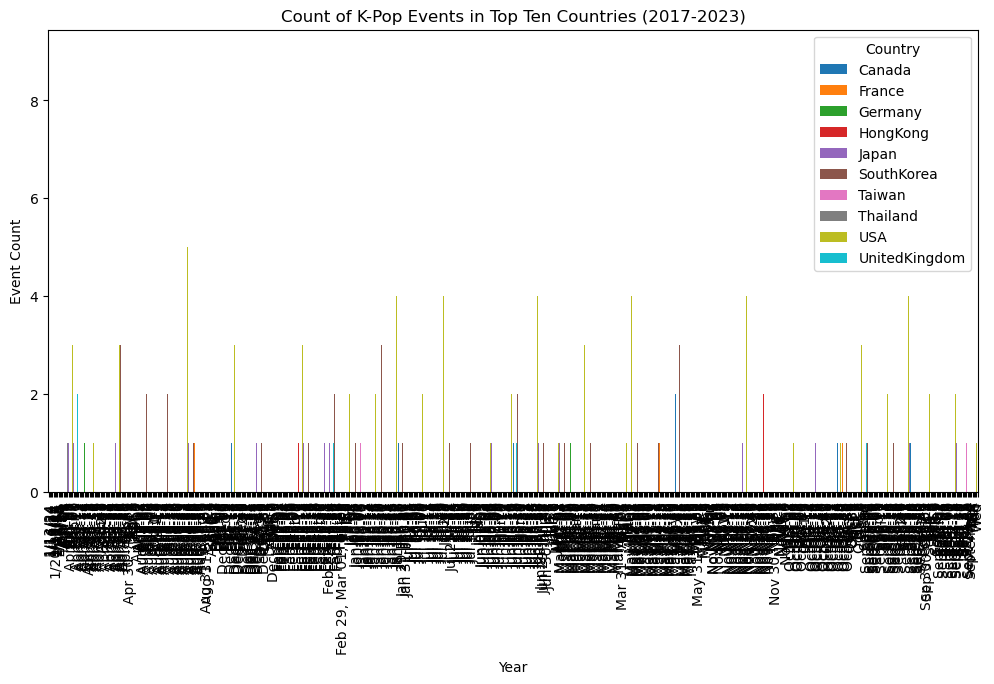

In [246]:
df_counts = merged_df.groupby(['Country', 'Date(s)']).size().reset_index(name='Event Count')

# Selecting the top ten countries
top_countries = df_counts.groupby('Country')['Event Count'].sum().nlargest(10).index

# Filtering the data for the top ten countries
df_top_countries = df_counts[df_counts['Country'].isin(top_countries)]

# Plotting the bar chart for the top ten countries
df_top_countries.pivot(index='Date(s)', columns='Country', values='Event Count').plot(kind='bar', figsize=(12, 6))
plt.title('Count of K-Pop Events in Top Ten Countries (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.show()

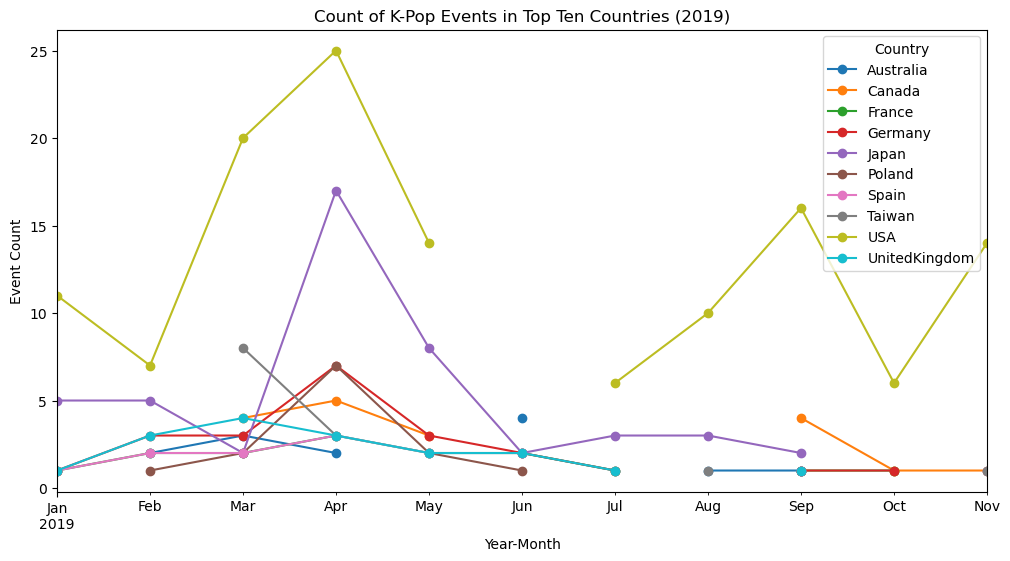

In [247]:
df_counts = events_2019.groupby(['Country', 'Date(s)']).size().reset_index(name='Event Count')

# Selecting the top ten countries
df_counts_month = df_counts.groupby(['Country', pd.Grouper(key='Date(s)', freq='M')]).size().reset_index(name='Event Count')

# Selecting the top ten countries
top_countries = df_counts_month.groupby('Country')['Event Count'].sum().nlargest(10).index

# Filtering the data for the top ten countries
df_top_countries_month = df_counts_month[df_counts_month['Country'].isin(top_countries)]

# Plotting the line chart for the top ten countries
df_top_countries_month.pivot(index='Date(s)', columns='Country', values='Event Count').plot(kind='line', figsize=(12, 6), marker = 'o')
plt.title('Count of K-Pop Events in Top Ten Countries (2019)')
plt.xlabel('Year-Month')
plt.ylabel('Event Count')
plt.show()

In [255]:
merged_df = remove_south_korea_rows(merged_df)

/var/folders/mk/v1928r054p7brpltxt8h4f6r0000gn/T/ipykernel_59320/775360894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].str.replace(' ', '')  # Remove white spaces from the 'Country' column


In [256]:
print(listholder)
len(listholder)

[]


0

In [257]:
from collections import Counter

artists_total = []
for i in merged_df['Artist / Guest']:
    artists_total.append(i.lower())

artist_counts = dict(Counter(artists_total))

sorted_artist_counts = sorted(artist_counts.items(), key=lambda item: item[1], reverse=True)

In [258]:
print(sorted_artist_counts)

[('eric nam', 98), ('monsta x', 78), ('the rose', 58), ('seventeen', 55), ('day6', 45), ('dpr', 42), ('epik high', 39), ('ateez', 36), ('hyukoh', 35), ('various', 33), ('blackpink', 32), ('ikon', 31), ('vav', 31), ('twice', 30), ('tiffany young', 29), ('epik high, woosung', 29), ('got7', 28), ('winner', 28), ('eric nam, audrey mika', 28), ('dreamcatcher', 27), ('kard', 27), ('bts', 26), ('sf9', 26), ('g-dragon', 25), ('stray kids', 24), ('sunmi', 24), ('pentagon', 20), ('golden child', 19), ('omega x', 19), ('sik-k', 18), ('blitzers', 18), ('mcnd', 18), ('loona', 18), ('astro', 17), ('txt', 17), ('dkb', 17), ('oneus', 16), ('verivery', 16), ('purple kiss', 16), ('bewhy', 15), ('vanner', 15), ('everglow', 15), ('wei', 15), ('mark tuan (got7)', 15), ('(g)i-dle', 15), ('yerin baek', 14), ('f.t. island', 13), ('oh my girl', 13), ('a.c.e.', 13), ('gfriend', 13), ('nct 127', 13), ('itzy', 13), ('ab6ix', 13), ('k.a.r.d', 12), ('wanna one', 12), ('super junior', 12), ('m.o.n.t', 12), ('mustb',